# California Housing Price Prediction - EDA

In [13]:
# Import necessary libraries
# Import basic libraries

# Import analysis libraries
import pandas as pd
import numpy as np

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Import dataset libraries
from sklearn.datasets import fetch_california_housing

# Import machine learning preprocessing libraries
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer, PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, KBinsDiscretizer
from sklearn.preprocessing import OrdinalEncoder, Binarizer, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Import model selection libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.model_selection import KFold, StratifiedKFold, TimeSeriesSplit
from sklearn.model_selection import train_test_split, cross_validate

# Import machine learning libraries
from sklearn.linear_model import LinearRegression, QuantileRegressor, HuberRegressor

# Import model evaluation libraries
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_pinball_loss


In [14]:
# Load California housing data
data = fetch_california_housing()
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [15]:
X, y = data.data, data.target

Combined features and target for EDA.

In [18]:
df = pd.concat([pd.DataFrame(X, columns=data.feature_names), pd.Series(y, name='target')], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Basic Data Exploration

In [20]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [21]:
df.duplicated().sum()

0

In [22]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [23]:
df.info

<bound method DataFrame.info of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       

#### Identify Categorical and Numerical Columns

In [29]:
# Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: []
Numerical columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'target']


#### Checking Numerical Columns

In [26]:
# Display unique values in numerical columns
for each_col in numerical_columns:
    print(f"Unique values in {each_col}: {df[each_col].unique()}")

Unique values in MedInc: [8.3252 8.3014 7.2574 ... 2.3598 2.3661 2.0943]
Unique values in HouseAge: [41. 21. 52. 42. 50. 40. 49. 48. 51. 43.  2. 46. 26. 20. 17. 36. 19. 23.
 38. 35. 10. 16. 27. 39. 31. 29. 22. 37. 28. 34. 32. 47. 44. 30. 18. 45.
 33. 24. 15. 14. 13. 25.  5. 12.  6.  8.  9.  7.  3.  4. 11.  1.]
Unique values in AveRooms: [6.98412698 6.23813708 8.28813559 ... 5.20554273 5.32951289 5.25471698]
Unique values in AveBedrms: [1.02380952 0.97188049 1.07344633 ... 1.14825581 1.17191977 1.16226415]
Unique values in Population: [ 322. 2401.  496. ... 3060. 2707. 6912.]
Unique values in AveOccup: [2.55555556 2.10984183 2.80225989 ... 2.3256351  2.12320917 2.61698113]
Unique values in Latitude: [37.88 37.86 37.85 37.84 37.83 37.82 37.81 37.8  37.79 37.77 37.78 37.76
 37.75 37.74 37.73 37.9  37.89 37.87 37.72 37.71 37.7  37.69 37.68 37.64
 37.63 37.66 37.65 37.67 37.61 37.62 37.6  37.59 37.58 37.57 37.49 37.52
 37.56 37.55 37.54 37.53 37.51 37.48 37.47 37.5  38.69 38.72 38.52 38.48


In [28]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#### Checking Categorical Columns

**No Categorical Columns in this project.**

In [30]:
for each_col in categorical_columns:
    print(f"Unique values in {each_col}: {df[each_col].unique()}")

## Data Cleaning

No data cleaning required.

## Feature Engineering : 

No 

## Imputation :

In [ ]:

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:

# Quantile regression (median and 90th percentile)
qr_median = QuantileRegressor(quantile=0.5, alpha=0.1, solver='highs').fit(X_train, y_train)
qr_high = QuantileRegressor(quantile=0.9, alpha=0.1, solver='highs').fit(X_train, y_train)

# Huber regression
huber = HuberRegressor(epsilon=1.35).fit(X_train, y_train)

# Predictions
y_pred_median = qr_median.predict(X_test)
y_pred_high = qr_high.predict(X_test)
y_pred_huber = huber.predict(X_test)


In [10]:

# Metrics
print("MAE (QR Median):", mean_absolute_error(y_test, y_pred_median))
print("MAE (QR 90%):", mean_absolute_error(y_test, y_pred_high))
print("MAE (Huber):", mean_absolute_error(y_test, y_pred_huber))
print("RMSE (QR Median):", mean_squared_error(y_test, y_pred_median, squared=False))
print("RMSE (QR 90%):", mean_squared_error(y_test, y_pred_high, squared=False))
print("RMSE (Huber):", mean_squared_error(y_test, y_pred_huber, squared=False))
print("R2 (QR Median):", qr_median.score(X_test, y_test))
print("R2 (QR 90%):", qr_high.score(X_test, y_test))
print("R2 (Huber):", huber.score(X_test, y_test))
print("Pinball Loss (QR 90%):", mean_pinball_loss(y_test, y_pred_high, alpha=0.9))


MAE (QR Median): 0.6285188232649649
MAE (QR 90%): 1.5592785217729819
MAE (Huber): 0.5158425621076339
RMSE (QR Median): 0.8754738772164282
RMSE (QR 90%): 1.7133646898522314
RMSE (Huber): 0.7584368218704814
R2 (QR Median): 0.41510282483163496
R2 (QR 90%): -1.2402308051744457
R2 (Huber): 0.5610329123803901
Pinball Loss (QR 90%): 0.20934675413142814


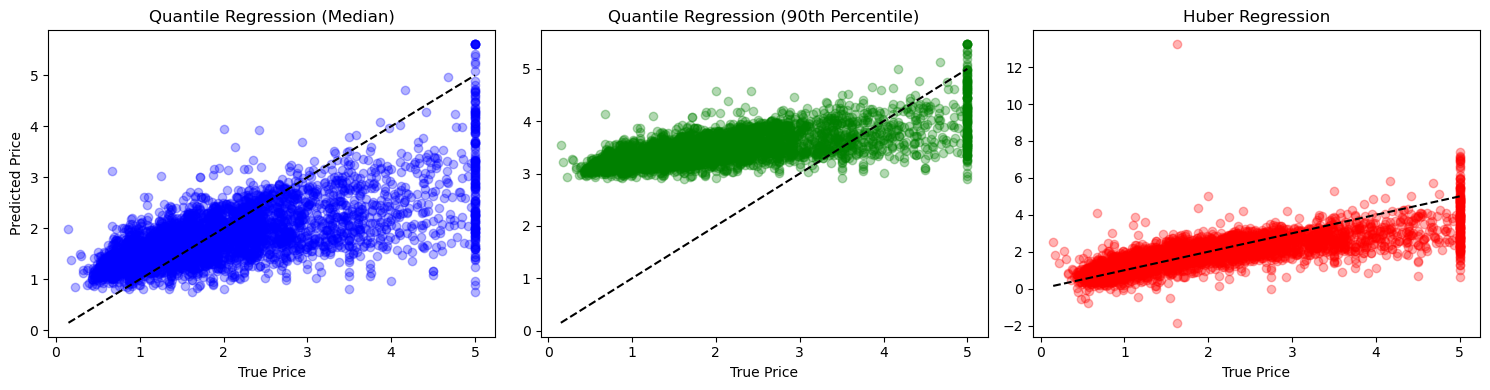

In [11]:

# Visualization
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_median, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title("Quantile Regression (Median)")
plt.xlabel("True Price")
plt.ylabel("Predicted Price")

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_high, alpha=0.3, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title("Quantile Regression (90th Percentile)")
plt.xlabel("True Price")

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_huber, alpha=0.3, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title("Huber Regression")
plt.xlabel("True Price")

plt.tight_layout()
plt.show()
